In [1]:
#!pip install kaggle
#!pip install sqlalchemy psycopg2

# 1. Carga de datos y librerías

Descargar dataset .csv desde kaggle

In [ ]:
import kaggle
!kaggle datasets download aditirai2607/super-market-dataset -f "Sample - Superstore.csv"

Importar librerías

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster

# 2. Exploración de datos

In [5]:
df = pd.read_csv("Sample%20-%20Superstore.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2021-103800,03-01-2021,07-01-2021,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2021-112326,04-01-2021,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2021-112326,04-01-2021,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2021-112326,04-01-2021,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2021-141817,05-01-2021,12-01-2021,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


Describir variables numéricas mediante estadísticos descriptivos

In [6]:
df.describe()

,Row ID,Sales,Quantity,Discount,Profit
count,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000
mean,5097.500000,228.225854,3.791838,0.155385,28.673417
std,2942.898656,619.906839,2.228317,0.206249,232.465115
min,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2549.250000,17.220000,2.000000,0.000000,1.760800
50%,5097.500000,53.910000,3.000000,0.200000,8.690000
75%,7645.750000,209.500000,5.000000,0.200000,29.297925
max,10194.000000,22638.480000,14.000000,0.800000,8399.976000


Verificar nulos

In [7]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country/Region,0
City,0


# 3. Transformación de columnas

Ajustar nombres de columnas y eliminar columna customer_name

In [8]:
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(" ","_")
df["country"]=df["country/region"]
df["state"]=df["state/province"]
df["sub_category"]=df["sub-category"]
df=df.drop(columns=["customer_name", "country/region", "state/province","sub-category"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row_id        10194 non-null  int64  
 1   order_id      10194 non-null  object 
 2   order_date    10194 non-null  object 
 3   ship_date     10194 non-null  object 
 4   ship_mode     10194 non-null  object 
 5   customer_id   10194 non-null  object 
 6   segment       10194 non-null  object 
 7   city          10194 non-null  object 
 8   postal_code   10194 non-null  object 
 9   region        10194 non-null  object 
 10  product_id    10194 non-null  object 
 11  category      10194 non-null  object 
 12  product_name  10194 non-null  object 
 13  sales         10194 non-null  float64
 14  quantity      10194 non-null  int64  
 15  discount      10194 non-null  float64
 16  profit        10194 non-null  float64
 17  country       10194 non-null  object 
 18  state         10194 non-nu

Convertir order_date y ship_date a formato fecha

In [10]:
df["order_date"]=pd.to_datetime(df["order_date"],format="%d-%m-%Y")
df["ship_date"]=pd.to_datetime(df["ship_date"],format="%d-%m-%Y")

In [11]:
df.describe()

,row_id,order_date,ship_date,sales,quantity,discount,profit
count,10194.000000,10194,10194,10194.000000,10194.000000,10194.000000,10194.000000
mean,5097.500000,2023-04-30 00:15:40.788699136,2023-05-03 23:20:43.790465024,228.225854,3.791838,0.155385,28.673417
min,1.000000,2021-01-03 00:00:00,2021-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2549.250000,2022-05-14 00:00:00,2022-05-19 00:00:00,17.220000,2.000000,0.000000,1.760800
50%,5097.500000,2023-06-25 00:00:00,2023-06-28 00:00:00,53.910000,3.000000,0.200000,8.690000
75%,7645.750000,2024-05-14 00:00:00,2024-05-18 00:00:00,209.500000,5.000000,0.200000,29.297925
max,10194.000000,2024-12-30 00:00:00,2025-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,2942.898656,NaN,NaN,619.906839,2.228317,0.206249,232.465115


# 4. Detección de outliers

Detectar outliers en columnas numéricas

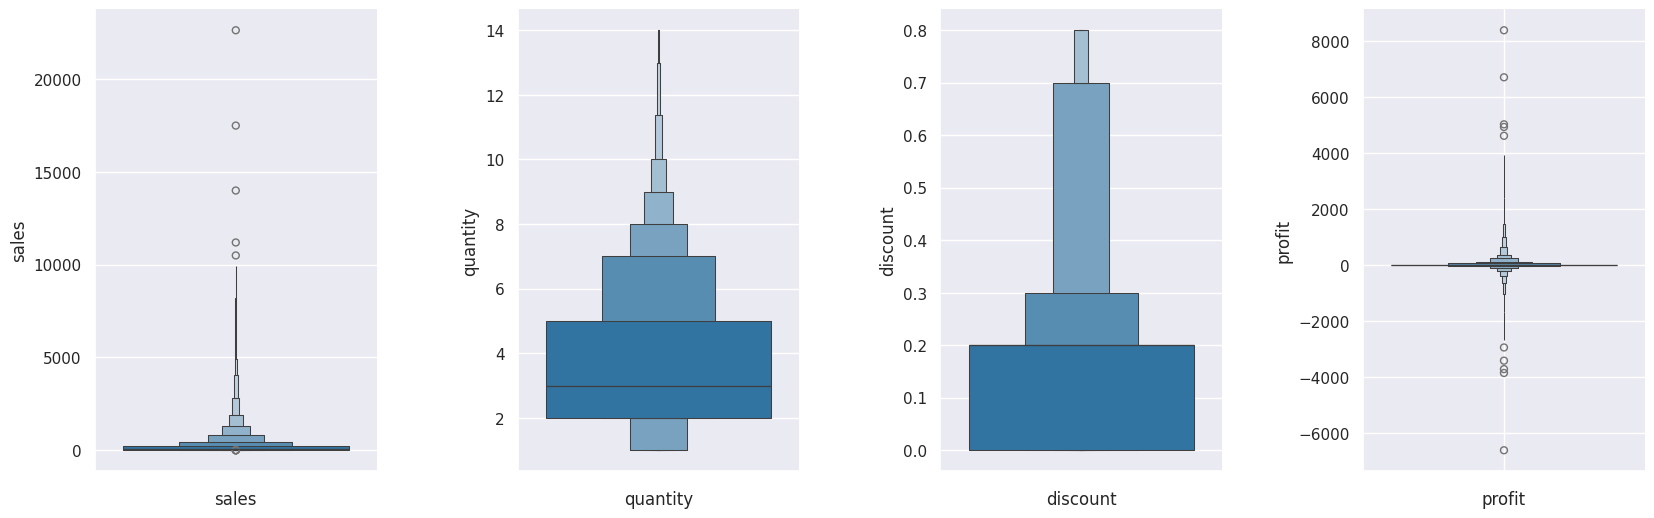

In [12]:
sns.set_theme(style="darkgrid", palette="tab10")

cols = ["sales","quantity","discount","profit"]

fig, ax = plt.subplots(ncols=len(cols), figsize=(5 * len(cols),6), sharex = True)

for i in range(len(cols)):
  (sns.boxenplot(y=df[cols[i]],data=df, showfliers=True,ax=ax[i])).set(xlabel=cols[i])

fig.subplots_adjust(wspace=0.5)
plt.grid(True)
sns.despine()

Eliminar outliers según índice

In [13]:
index_names = df[(df["sales"] > 10000) | (df["profit"] > 4000) | (df["profit"] < -2600)].index
df.drop(index_names, inplace = True)
df.reset_index(drop= True, inplace=True)

# 5. Segmentación de clientes mediante K-means

Se consideran variables ship_mode, segment, category y region, más variables numéricas para segmentar

Transformación a variables dummy para cada variable nominal

In [14]:
categorical_columns = ["ship_mode", "segment", "category", "region"]
one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
one_hot_encoder.fit(df[categorical_columns])
df_encoded = one_hot_encoder.transform(df[categorical_columns])

#Convertir a un nuevo dataframe
df_encoded = pd.DataFrame(df_encoded, columns=one_hot_encoder.get_feature_names_out())
df2=df[["customer_id","sales","quantity","discount","profit"]]
df2 = pd.concat([df2,df_encoded] , axis=1)

#Eliminar variables dummy redundantes
df2=df2.drop(["ship_mode_Standard Class","segment_Home Office","category_Technology","region_West"],axis=1)

Agrupar por customer_id

In [16]:
df2=df2.groupby('customer_id').agg({
    "sales": "sum",
    "quantity": "sum",
    "discount": "mean",
    "profit": "sum",
    "ship_mode_First Class": "mean",
    "ship_mode_Same Day": "mean",
    "ship_mode_Second Class": "mean",
    "segment_Consumer": "mean",
    "segment_Corporate": "mean",
    "category_Furniture": "mean",
    "category_Office Supplies": "mean",
    "region_Central": "mean",
    "region_East": "mean",
    "region_South": "mean",
}).reset_index()
df2.head()

,customer_id,sales,quantity,discount,profit,ship_mode_First Class,ship_mode_Same Day,ship_mode_Second Class,segment_Consumer,segment_Corporate,category_Furniture,category_Office Supplies,region_Central,region_East,region_South
0,AA-10315,5563.560,30,0.090909,-362.8825,0.090909,0.000000,0.0,1.0,0.0,0.090909,0.727273,0.545455,0.181818,0.000000
1,AA-10375,1056.390,41,0.080000,277.3824,0.266667,0.000000,0.2,1.0,0.0,0.066667,0.733333,0.133333,0.333333,0.266667
2,AA-10480,1790.512,36,0.016667,435.8274,0.000000,0.083333,0.0,1.0,0.0,0.166667,0.666667,0.833333,0.083333,0.083333
3,AA-10645,5086.935,64,0.063889,857.8033,0.388889,0.000000,0.0,1.0,0.0,0.444444,0.444444,0.166667,0.333333,0.222222
4,AB-10015,886.156,13,0.066667,129.3465,0.833333,0.000000,0.0,1.0,0.0,0.333333,0.500000,0.500000,0.000000,0.000000


Normalizar columnas antes de aplicar K-means

In [17]:
customer_id = df2[["customer_id"]]
df2 = df2.drop(columns=["customer_id"])
scaler = StandardScaler(copy = True, with_mean = True, with_std = True)
df2 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
df2.head()

,sales,quantity,discount,profit,ship_mode_First Class,ship_mode_Same Day,ship_mode_Second Class,segment_Consumer,segment_Corporate,category_Furniture,category_Office Supplies,region_Central,region_East,region_South
0,1.231514,-0.690092,-0.721825,-1.161190,-0.348894,-0.465033,-0.934721,0.96576,-0.650391,-0.840101,0.746410,1.612001,-0.500932,-0.878412
1,-0.740812,-0.268165,-0.840282,-0.122204,0.603480,-0.465033,0.036227,0.96576,-0.650391,-0.996739,0.782446,-0.460720,0.136135,0.549052
2,-0.419562,-0.459950,-1.527993,0.134911,-0.841502,0.272121,-0.934721,0.96576,-0.650391,-0.350606,0.386049,3.059857,-0.915026,-0.432330
3,1.022944,0.614046,-1.015226,0.819670,1.265763,-0.465033,-0.934721,0.96576,-0.650391,1.444210,-0.935272,-0.293074,0.136135,0.311141
4,-0.815306,-1.342161,-0.985063,-0.362428,3.674066,-0.465033,-0.934721,0.96576,-0.650391,0.726284,-0.604942,1.383392,-1.265413,-0.878412


Analizar si existe correlación entre variables

Primero se aplica el test de Kolmogorov-Smirnov

In [18]:
stat, p = kstest(df2['sales'], 'norm')
print(f"Sales K-S Test: p-value = {p}")
stat, p = kstest(df2['quantity'], 'norm')
print(f"quantity K-S Test: p-value = {p}")
stat, p = kstest(df2['discount'], 'norm')
print(f"discount K-S Test: p-value = {p}")
stat, p = kstest(df2['profit'], 'norm')
print(f"profit K-S Test: p-value = {p}")

Sales K-S Test: p-value = 4.512964203730778e-10
quantity K-S Test: p-value = 0.00019566038533071558
discount K-S Test: p-value = 0.013333148359867625
profit K-S Test: p-value = 1.969231771456835e-13


Se obtiene que la data no distribuye normal, se utiliza correlación de Spearman


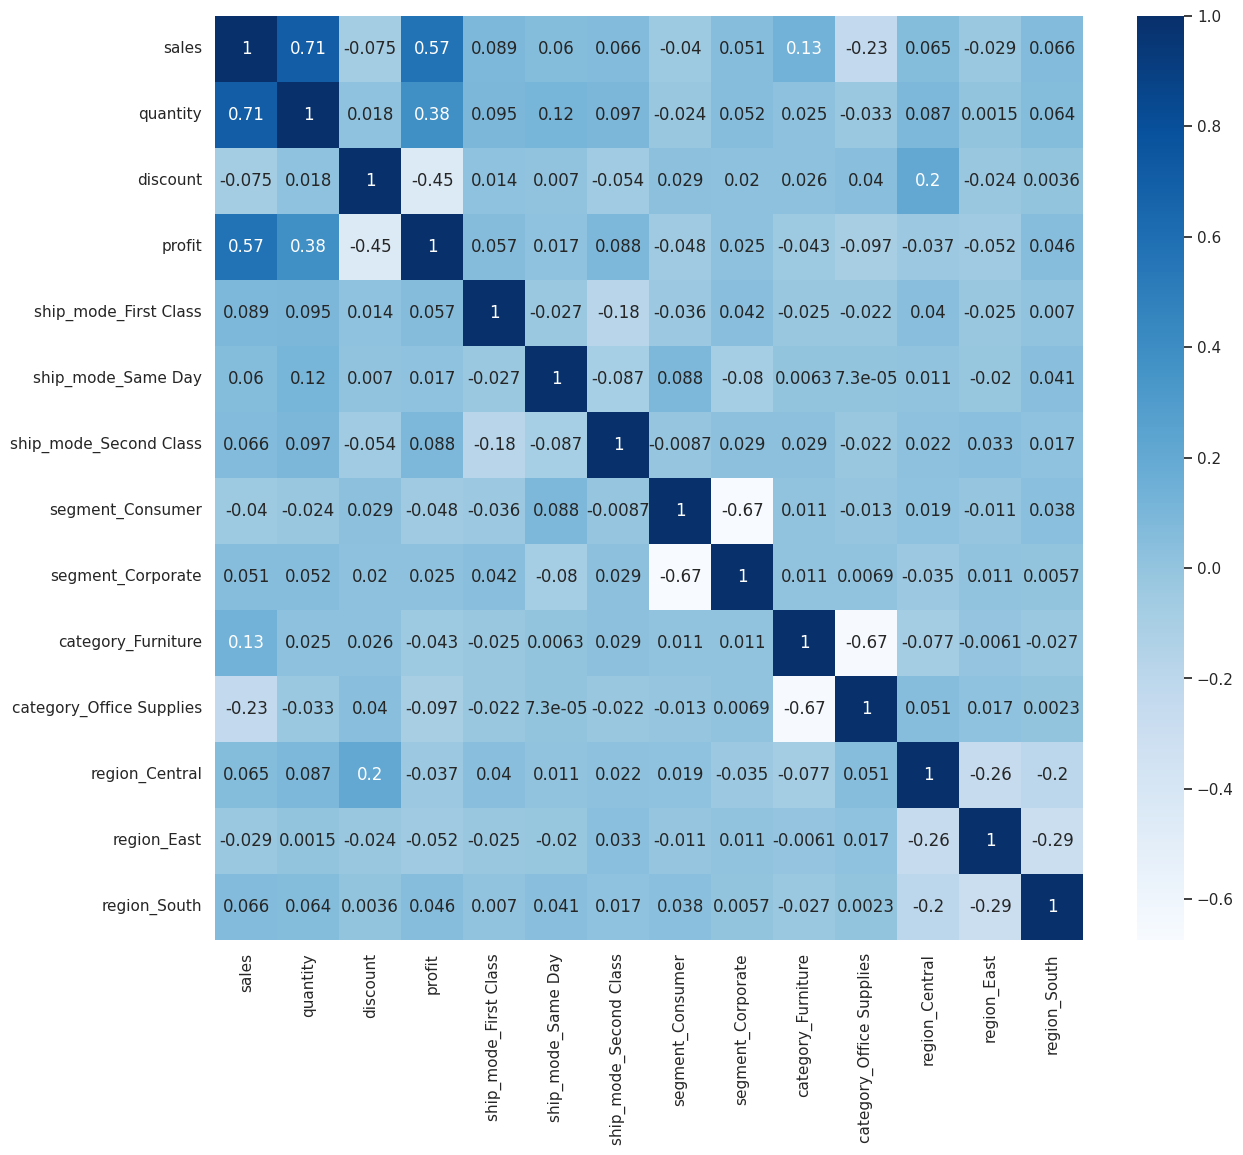

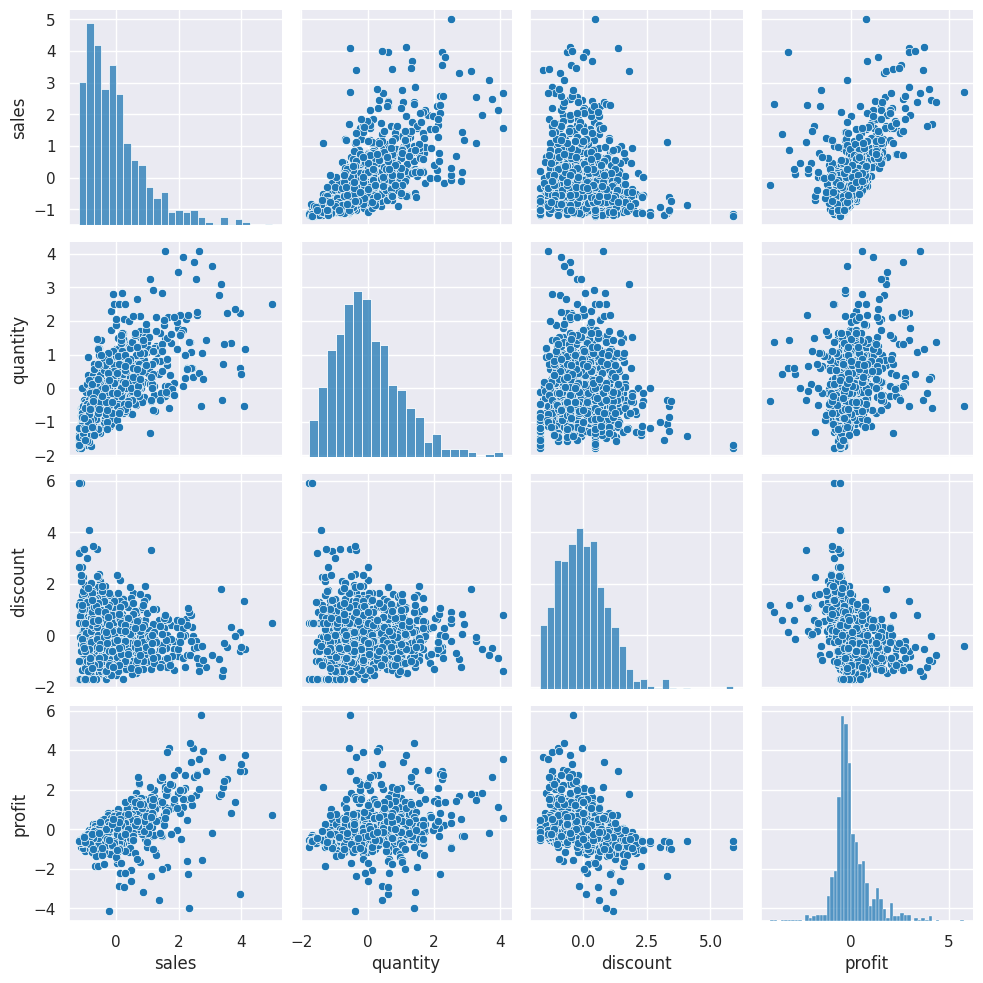

In [19]:
# Heatmap
fig = plt.figure(figsize=(14,12))
sns.heatmap(df2.corr(method="spearman"), annot = True,cmap = "Blues")

# Pairplot
sns.pairplot(df2[["sales","quantity","discount","profit"]])
sns.despine()



Se observa una alta correlación entre sales y quantity, al igual que para sales y profit

Aplicar K-means, generando gráfico de Elbow para determinar K óptimo

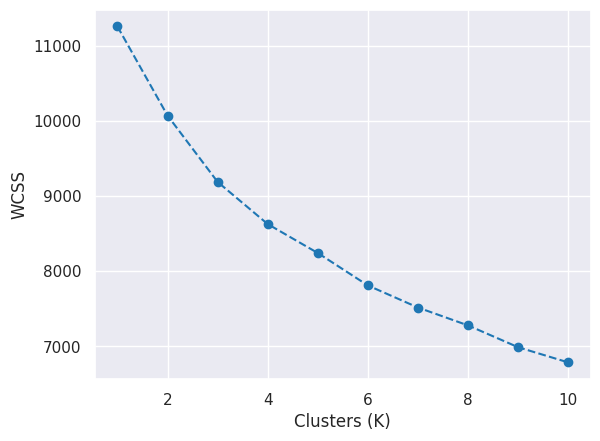

In [20]:
# Probar valores de K
wcss = []
for k in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=k, random_state=111, n_init=10)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)

# Generar grafico
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Clusters (K)")
plt.ylabel("WCSS")
plt.show()

Se considerará K=5

Se ajusta el algoritmo con el K elegido



In [21]:
K=5
kmeans = cluster.KMeans(n_clusters=K, init="k-means++",random_state=0)
kmeans.fit(df2)
df2['cluster'] = kmeans.labels_
df2 = pd.concat([customer_id, df2], axis=1)


Hacer un left join para incorporar cluster a cada cliente en el dataframe original

In [22]:
df = df.merge(df2[['customer_id', 'cluster']], on='customer_id', how='left')
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,postal_code,region,...,category,product_name,sales,quantity,discount,profit,country,state,sub_category,cluster
0,1,US-2021-103800,2021-01-03,2021-01-07,Standard Class,DP-13000,Consumer,Houston,77095,Central,...,Office Supplies,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,United States,Texas,Paper,4
1,2,US-2021-112326,2021-01-04,2021-01-08,Standard Class,PO-19195,Home Office,Naperville,60540,Central,...,Office Supplies,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,United States,Illinois,Binders,4
2,3,US-2021-112326,2021-01-04,2021-01-08,Standard Class,PO-19195,Home Office,Naperville,60540,Central,...,Office Supplies,Avery 508,11.784,3,0.2,4.2717,United States,Illinois,Labels,4
3,4,US-2021-112326,2021-01-04,2021-01-08,Standard Class,PO-19195,Home Office,Naperville,60540,Central,...,Office Supplies,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,United States,Illinois,Storage,4
4,5,US-2021-141817,2021-01-05,2021-01-12,Standard Class,MB-18085,Consumer,Philadelphia,19143,East,...,Office Supplies,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,United States,Pennsylvania,Art,1


# 6. Exportación a PostgreSQL

Exportación mediante sqlalchemy

In [ ]:
from sqlalchemy import create_engine

DATABASE_URL = "[server]/supermarket_sales"
engine = create_engine(DATABASE_URL)

conn=engine.connect()

La tabla debe estar creada en SQL antes de exportar los datos

In [ ]:
df.to_sql("df_sales", con=conn, index=False, if_exists='append')

181

Largo máximo en cada columna de texto

In [ ]:
max_lengths = df.select_dtypes(include=['object']).apply(lambda col: col.str.len().max())
print(max_lengths)

order_id         14
ship_mode        14
customer_id       8
segment          11
city             17
postal_code       5
region            7
product_id       15
category         15
product_name    127
country          13
state            25
sub_category     11
dtype: int64
